# Supreetha Katta
20BBS0195
ADS Assignment-3

In [7]:
#2. Loading the dataset into the notebook:
import pandas as pd
import numpy as np
data = pd.read_csv("Housing.csv")

In [8]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


### 3. Performing Univariate, Bi-variate and Multivariate analysis

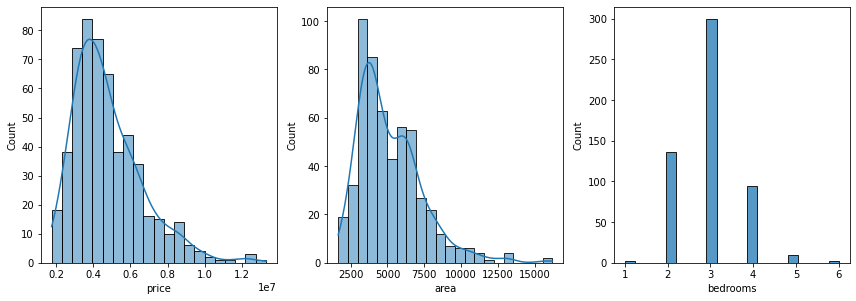

In [9]:
# a) Univariate Analysis:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
sns.histplot(data['price'], kde = True)
plt.xlabel('price')

plt.subplot(2,3,2)
sns.histplot(data['area'], kde = True)
plt.xlabel('area')

plt.subplot(2,3,3)
sns.histplot(data['bedrooms'])
plt.xlabel('bedrooms')
plt.tight_layout()
plt.show()

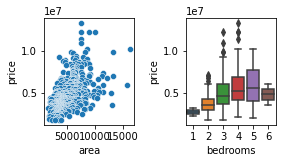

In [10]:
# b) Bi-Variate Analysis:
plt.subplot(2,3,1)
sns.scatterplot(x = data['area'], y = data['price'])
plt.xlabel('area')
plt.ylabel('price')

plt.subplot(2,3,2)
sns.boxplot(x = data['bedrooms'], y = data['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')

plt.tight_layout()
plt.show()

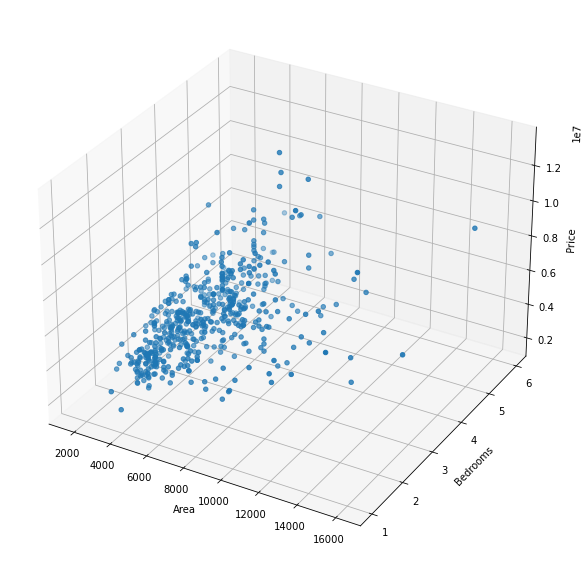

In [11]:
# c) Multi-Variate Analysis:

plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(data['area'], data['bedrooms'], data['price'])
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

plt.tight_layout()
plt.show()

### 4. Perform descriptive statistics on the dataset.

In [12]:
df.shape

(545, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [10]:
statistics = data.describe()
print(statistics)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [12]:
mean_price = data['price'].mean()
median_area = data['area'].median()
std_bedrooms = data['bedrooms'].std()

print("mean price:", mean_price)
print("median area:", median_area)
print("S.D of Bedrooms:", std_bedrooms)

mean price: 4766729.247706422
median area: 4600.0
S.D of Bedrooms: 0.738063860568575


### 6. Find the outliers and replace them outliers

In [17]:
# finding the outliers using z-score method:
z_threshold = 3
z_scores = (data.select_dtypes(include=np.number) - data.select_dtypes(include=np.number).mean()) / data.select_dtypes(include=np.number).std()

outliers = (z_scores.abs() > z_threshold).any(axis=1)
data[outliers] = np.nan 
print(data)

         price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0          NaN     NaN       NaN        NaN      NaN      NaN       NaN   
1          NaN     NaN       NaN        NaN      NaN      NaN       NaN   
2          NaN     NaN       NaN        NaN      NaN      NaN       NaN   
3          NaN     NaN       NaN        NaN      NaN      NaN       NaN   
4          NaN     NaN       NaN        NaN      NaN      NaN       NaN   
..         ...     ...       ...        ...      ...      ...       ...   
540  1820000.0  3000.0       2.0        1.0      1.0      yes        no   
541  1767150.0  2400.0       3.0        1.0      1.0       no        no   
542  1750000.0  3620.0       2.0        1.0      1.0      yes        no   
543  1750000.0  2910.0       3.0        1.0      1.0       no        no   
544  1750000.0  3850.0       3.0        1.0      2.0      yes        no   

    basement hotwaterheating airconditioning  parking furnishingstatus  
0        NaN             N

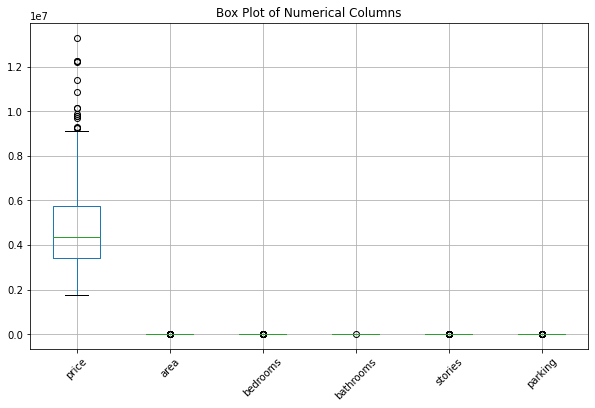

In [24]:
import matplotlib.pyplot as plt

numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# box plots
plt.figure(figsize=(10, 6))
data[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Columns')
plt.show()

In [25]:
lower_bound = data[numerical_cols].quantile(0.25) - 1.5 * (data[numerical_cols].quantile(0.75) - data[numerical_cols].quantile(0.25))
upper_bound = data[numerical_cols].quantile(0.75) + 1.5 * (data[numerical_cols].quantile(0.75) - data[numerical_cols].quantile(0.25))

# Remove outliers from the dataset
data_no_outliers = data[~((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)]

# Print the number of removed outliers
num_outliers_removed = len(data) - len(data_no_outliers)
print("Number of outliers removed:", num_outliers_removed)

Number of outliers removed: 82


### 7. Check for Categorical columns and perform encoding.

In [26]:
from sklearn.preprocessing import OneHotEncoder 
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

data_encoded = pd.get_dummies(data, columns=categorical_columns)
print(data_encoded)

        price  area  bedrooms  bathrooms  stories  parking  mainroad_0  \
0    13300000  7420         4          2        3        2           0   
1    12250000  8960         4          4        4        3           0   
2    12250000  9960         3          2        2        2           0   
3    12215000  7500         4          2        2        3           0   
4    11410000  7420         4          1        2        2           0   
..        ...   ...       ...        ...      ...      ...         ...   
540   1820000  3000         2          1        1        2           0   
541   1767150  2400         3          1        1        0           1   
542   1750000  3620         2          1        1        0           0   
543   1750000  2910         3          1        1        0           1   
544   1750000  3850         3          1        2        0           0   

     mainroad_1  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0             1             1       

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
     

data['mainroad_1'] = le.fit_transform(data['mainroad_1'])
     

data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_0,mainroad_1,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,0


### 9. Scale the independent variables

In [41]:
X = data.drop('price', axis=1) 
y = data['price'] 

In [43]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_0,mainroad_1,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,1,0,0
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,1,0,0
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0,1,1,0,0,1,1,0,1,0,0,0,1
541,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
543,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [44]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### 10. Scaling 

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_0,mainroad_1,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,1,0,0
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,1,0,0
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,0


### 10. Split the data into training and testing

In [48]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('Housing.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape,X_test.shape

((436, 18), (109, 18))

In [50]:
y_train.shape,y_test.shape

((436,), (109,))

### 11. Build the Model

In [51]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

### 12. Train the Model

ValueError: x and y must be the same size

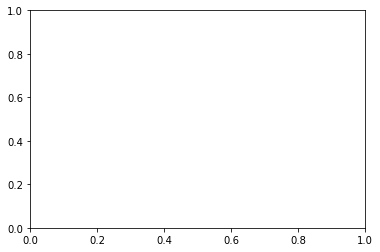

In [57]:
plt.scatter(X_train, y_train)


### 13. Test the Model

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1944415947572.79


### 14. Measure the performance using Metrics.

In [56]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Absolute Error: 1022165.4504587157
Mean Squared Error: 1944415947572.79
